# Mapping the human gamut
---
This notebook is part 3/5 of a tutorial based on the [```colourspace```](https://github.com/gillesferrand/colourspace) package.

Here we map the maximum gamut that humans can perceive (everywhere in this package I call it the "full" gamut), using the ```limits``` and ```gamuts``` modules. The full gamut is a theoretical gamut, no existing display covers it all, and some colours may not even be realized in nature. 

## Knowing the limits

In [1]:
from colourspace import limits

convertor = 'custom' (illuminant = 'D65')


The boundaries of the full human gamut are called optimal colour stimuli aka MacAdam limits. To compute them we follow the [notes by Bruce Lindbloom](http://www.brucelindbloom.com/index.html?LabGamutDisplayHelp.html). (Note that B.L. calls it "the Lab gamut", only because he is displaying it in the Lab space on this page. The gamut is defined in any colour space, and B.L. does display it in three different CIE spaces [on this page](http://www.brucelindbloom.com/index.html?LabGamutDisplay.html).) <br>It is known that the boundary colours are obtained for distributions of light that are square pulses. In the limit where these pulses are narrow enough to be called monochromatic, they delineate the CIE horseshoe. When considering all possible pulse widths, they draw the MacAdam surface in 3D. <br>To compute the CIE colours for a given spectral distribution, we rely on the [```colour```](https://github.com/colour-science/colour) package from [colour-science.org](https://www.colour-science.org), specifically its function ```spectral_to_XYZ()```. This requires setting an illuminant, here again we assume the standard D65. The resulting colour is expressed in the CIE XYZ space, which is therefore the native colour space for the full gamut.

### Computation

The function ```find_limits(l_min,l_max,l_step)``` finds the limit colours by this method, where ```l``` stands for the wavelength λ (expressed in nm). The default spectral range is from λmin = 360 nm to λmax = 780 nm, the interval λstep has been set by colour scientists to be one of 1, 5, 10, or 20 nm. The limit colours are converted to other spaces, the results are stored in ```limits['cmp'][space]``` where ```space='XYZ'|'Lab'|'LCH'|'RGB'```. Optionally the XYZ array is saved to disk as a NumPy binary file, it can be saved/loaded from/to the ```limits``` dictionary with ```save_limits()``` / ```load_limits()```. (The spectral parameters used for the currently set limits are stored in ```limits_domain```.)

In [2]:
%time limits.find_limits(l_step=10)

n = 1808                                 
X  =  0.0  –  95.0465322084
Y  =  0.0  –  100.0
Z  =  -2.9371673562e-06  –  108.897071474
saving limits to /Users/gferrand/simus/colour/colourspace/limits/limits_360-780-10_XYZ.npy: 1808 points
CPU times: user 15.1 s, sys: 2.3 s, total: 17.4 s
Wall time: 19.5 s


In [3]:
print(limits.limits_domain)
print(limits.limits['cmp'].keys())
print(limits.limits['cmp']['XYZ'].shape)
print(limits.limits['cmp']['XYZ'])

{'l_min': 360, 'l_max': 780, 'l_step': 10}
dict_keys(['XYZ', 'Lab', 'LCH', 'RGB'])
(1808, 3)
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  2.44979667e-04   7.44495106e-06   1.14115006e-03]
 [  2.10971174e-03   6.33135361e-05   9.89062197e-03]
 ..., 
 [  9.50457675e+01   9.99997239e+01   1.08897069e+02]
 [  9.50459882e+01   9.99998035e+01   1.08897069e+02]
 [  9.50465322e+01   1.00000000e+02   1.08897069e+02]]


The [```colour```](https://github.com/colour-science/colour) package actually contains a representation of the limits (in xyY space), these were not computed by them but taken tabulated in a book, and are of low resolution (see [issue #364](https://github.com/colour-science/colour/issues/364)). The values are loaded on import by ```get_limits_ref()``` and stored in ```limits['ref']```, for comparison.

In [4]:
print(limits.limits['ref']['XYZ'].shape)

(240, 3)


### Visualization

In [5]:
%matplotlib inline

In [6]:
figsize = (8,6)

Some plotting functions are provided to visualize the limits.

```plot_limits3D()``` shows the points as a 3D scatter plot, using ```mplot3d.Axes3D```. <br>
Each point is assigned its colour, obviously clipped to fit in the sRGB gamut if needs be.<br>
The reference points from the [```colour```](https://github.com/colour-science/colour) package can be over-plotted.

loading limits from /Users/gferrand/simus/colour/colourspace/limits/limits_360-780-10_XYZ.npy: 1808 points
1808  points
240  points


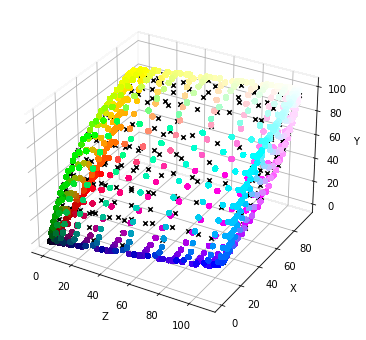

In [7]:
limits.load_limits(10) # λ step = 10 nm

limits.plot_limits3D(kind='cmp', space='XYZ', figsize=figsize)
limits.plot_limits3D(kind='ref', space='XYZ', over=True)

loading limits from /Users/gferrand/simus/colour/colourspace/limits/limits_360-780-1_XYZ.npy: 176822 points
176822  points
240  points


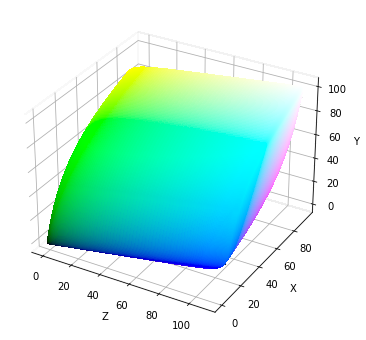

In [8]:
limits.load_limits(1) # λ step = 1 nm

limits.plot_limits3D(kind='cmp', space='XYZ', figsize=figsize)
limits.plot_limits3D(kind='ref', space='XYZ', over=True)

The interactive widget allows us to manipulate the 3D view. But beware, Matplotlib is not a 3D plotting library, and ```Axes3D``` has severe limitations. The rendering performance scales very poorly with the data size, and the depth ordering is wrong: coloured dots are composited according to their colour regardless of their respective location along the line of sight. This is a well known issue (see [issue #241](https://github.com/colour-science/colour/issues/241)), which could only be solved by using a 3D plotting engine.

Let's have a look in different colour spaces

In [9]:
limits.load_limits(10)

loading limits from /Users/gferrand/simus/colour/colourspace/limits/limits_360-780-10_XYZ.npy: 1808 points


1808  points


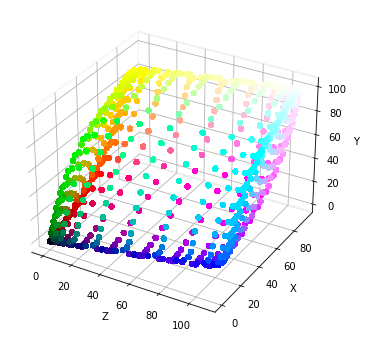

In [10]:
limits.plot_limits3D(kind='cmp', space='XYZ', figsize=figsize)

1808  points


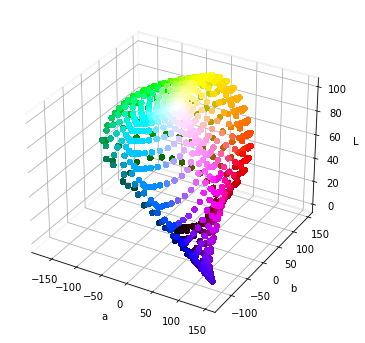

In [11]:
limits.plot_limits3D(kind='cmp', space='Lab', figsize=figsize)

1808  points


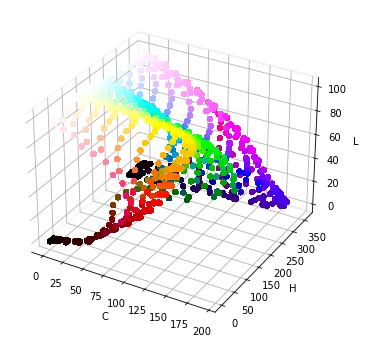

In [12]:
limits.plot_limits3D(kind='cmp', space='LCH', figsize=figsize)

1808  points


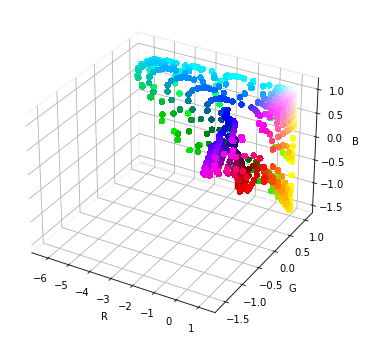

In [13]:
limits.plot_limits3D(kind='cmp', space='RGB', figsize=figsize)

The shapes obtained in XYZ and Lab are the same as on [www.brucelindbloom.com](http://www.brucelindbloom.com), and other resources.<br>
The LCH plot is most useful when interpreted as a function C of L,H (this is the basis of the "backward" method below).<br>
The RGB plots show that the sRGB gamut [0,1]^3 is much too small to contain all the possible colours.

```plot_limits2D()``` shows all the point in a 2D slice, of a given width (by default the entire range), along a given dimension (numbered 0,1,2). 

1808  points


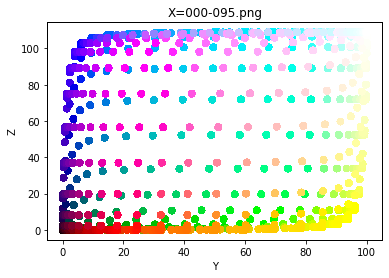

In [14]:
limits.plot_limits2D(kind='cmp',space='XYZ',dim=0)

1262  points


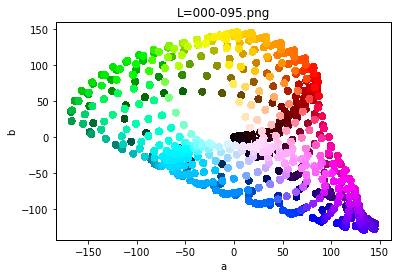

In [15]:
limits.plot_limits2D(kind='cmp',space='Lab',dim=0)

151  points
22  points
99  points
16  points
239  points
45  points


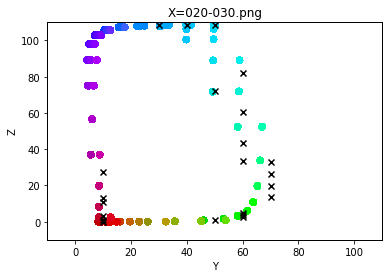

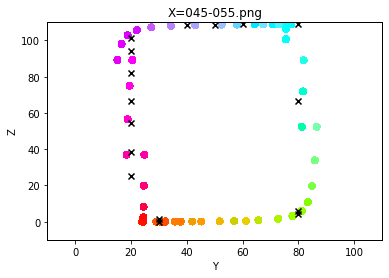

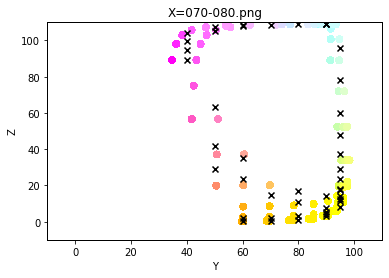

In [16]:
dim = 0
bins = [[20,30], [45,55], [70,80]]
for bin in bins:
    ranges = {0:bin,1:[-10,110],2:[-10,110]}
    limits.plot_limits2D(kind='cmp',space='XYZ',dim=dim,ranges=ranges)
    limits.plot_limits2D(kind='ref',space='XYZ',dim=dim,ranges=ranges,over=True)

```plot_limits2D_bins()``` generates all the plots along a given dimension with a given binning.

## Mapping the gamut in LCH

We can now devise the Cmax(L,H) for the full gamut, as we did in the previous notebook for the sRGB gamut. We again have two methods. We can re-use the same machinery in ```gamut```, just with a different validation function (forward method) or set of limit points (backward method).

In [17]:
from colourspace import gamut

### Forward method

In this method, for a given LCH colour, we convert it to the native space of the gamut (in the case of the full gamut, XYZ), and we check if it is within the gamut boundaries. Given the somewhat complicated shape of the full gamut, we proceed by first triangulating it, using ```scipy.spatial.Delaunay```. The result is stored in the ```triangulation``` dictionary. It is a Python object, that may be saved using ```pickle``` (it grows big with the number of points). It can be visualized with ```plot_triangulation()``` that relies on Matplotlib's ```plot_trisurf()```.

In [18]:
limits.load_limits(10)
limits.triangulate('XYZ')
limits.triangulation['cmp']['XYZ']

loading limits from /Users/gferrand/simus/colour/colourspace/limits/limits_360-780-10_XYZ.npy: 1808 points


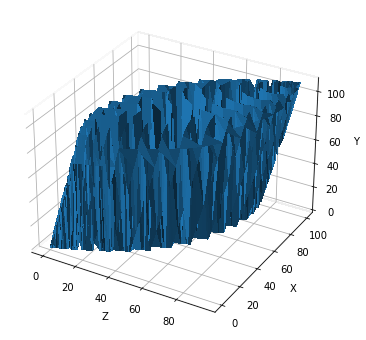

In [19]:
limits.plot_triangulation('XYZ', figsize=figsize)

Then the function ```within_limits(point,space)``` checks whether a given colour point is within the triangulated limit surface. This takes a single line of code, using ```find_simplex()```, but runtime scales poorly with the number of points.

In [20]:
limits.within_limits([50,50,50],'XYZ')

True

Inside ```gamut``` this function is used to define the validator function ```valid_LCH_full(LCH)```, that takes for inputs LCH coordinates.

In [21]:
print(gamut.valid_LCH_full(50,100,310))
print(gamut.valid_LCH_full(50,100,200))

True
False


Then we proceed in the same way as before.

In [22]:
%time gamut.find_Cmax_forward(1, 'full', save=False, plot=False)
print(gamut.Cmax[1]['full'].shape)

CPU times: user 25.4 s, sys: 382 ms, total: 25.8 s
Wall time: 29.8 s
(101, 361)


In [23]:
%time gamut.find_Cmax_forward(2, 'full', save=False, plot=False)
print(gamut.Cmax[2]['full'].shape)

CPU times: user 1min 43s, sys: 873 ms, total: 1min 44s
Wall time: 1min 46s
(201, 721)


In [24]:
print(gamut.get_extremum(1,'full'))
print(gamut.get_extremum(2,'full'))

[  11.  191.  319.]
[  12.5        192.6000061  318.5      ]


In [25]:
figsize = (12,12/3.6)
dpi = 200

writing /Users/gferrand/simus/colour/colourspace/gamut/Cmax_res1_full_axon.png
writing /Users/gferrand/simus/colour/colourspace/gamut/Cmax_res1_full_axoff.png


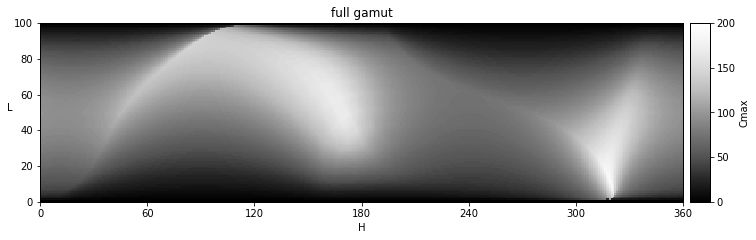

In [26]:
gamut.plot_Cmax(1, 'full', figsize=figsize, dpi=dpi)

writing /Users/gferrand/simus/colour/colourspace/gamut/Cmax_res2_full_axon.png
writing /Users/gferrand/simus/colour/colourspace/gamut/Cmax_res2_full_axoff.png


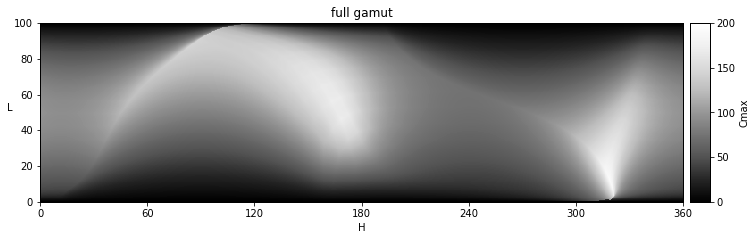

In [27]:
gamut.plot_Cmax(2, 'full', figsize=figsize, dpi=dpi)

### Backward method

In ```gamut``` the function ```get_edges_LCH_full(res)``` simply returns the list of limit points we have computed above using ```limits```. Here ```res``` is the resolution in wavelength λ. Then we can proceed with the interpolation of Cmax(L,H) as before.

loading limits from /Users/gferrand/simus/colour/colourspace/limits/limits_360-780-10_XYZ.npy: 1808 points


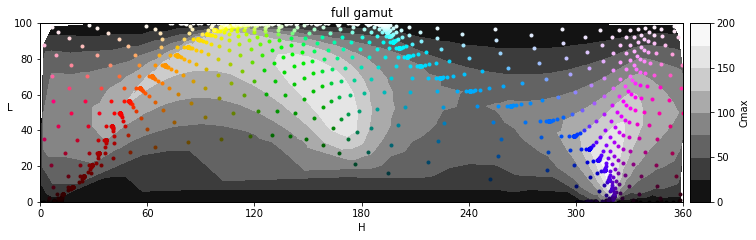

In [28]:
LCH_max = gamut.get_edges_LCH['full'](10)
gamut.plot2D(LCH_max,marker='.', colour='', name='full', figsize=figsize, dir='')

In this figure each dot marks a colour sampled from the MacAdam limits, the greyscale contours code the interpolated value of C. Cmax is re-sampled on a regular grid by ```find_Cmax_backward()```.

loading limits from /Users/gferrand/simus/colour/colourspace/limits/limits_360-780-10_XYZ.npy: 1808 points
CPU times: user 76.5 ms, sys: 7.5 ms, total: 84 ms
Wall time: 40.2 ms
writing /Users/gferrand/simus/colour/colourspace/gamut/Cmax_res1_full_axon.png
writing /Users/gferrand/simus/colour/colourspace/gamut/Cmax_res1_full_axoff.png


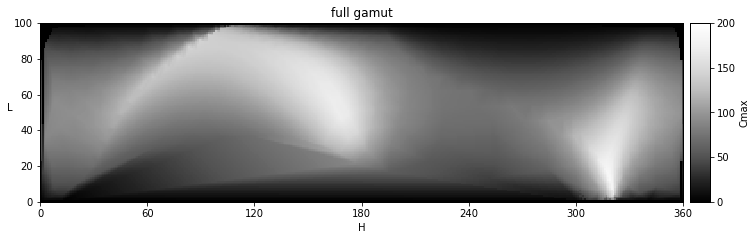

In [29]:
%time gamut.find_Cmax_backward(10, 1, 'full', save=False, plot=False)
gamut.plot_Cmax(1, 'full', figsize=figsize, dpi=dpi)

loading limits from /Users/gferrand/simus/colour/colourspace/limits/limits_360-780-1_XYZ.npy: 176822 points
CPU times: user 3.62 s, sys: 164 ms, total: 3.78 s
Wall time: 2.74 s
writing /Users/gferrand/simus/colour/colourspace/gamut/Cmax_res1_full_axon.png
writing /Users/gferrand/simus/colour/colourspace/gamut/Cmax_res1_full_axoff.png


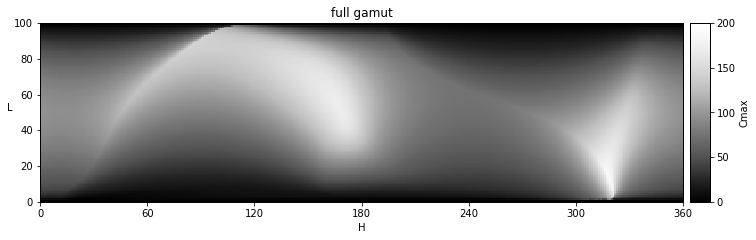

In [30]:
%time gamut.find_Cmax_backward(1, 1, 'full', save=False, plot=False)
gamut.plot_Cmax(1, 'full', figsize=figsize, dpi=dpi)

With sufficient spectral resolution, we recover the same Cmax as above. (Note that for the full gamut, the smaller ```res_native``` in nm, the higher the precision.)

### Using the gamut

The pre-computed gamut is provided at resolutions ```res=1``` and ```res=10``` (where we recall that ```res``` is the number of points per L, H unit), as NumPy binary files.

The functions ```set_Cmax(res,gmt)``` and ```Cmax_for_LH(L,H,res,gmt)``` provided by ```gamut``` work in the same way for ```gmt='sRGB'``` and ```gmt='full'```.

In [31]:
res = 10
gamut.set_Cmax(res,'full')
gamut.Cmax_for_LH(50,200,res,'full')

loading gamut from /Users/gferrand/simus/colour/colourspace/gamut/Cmax_res10_full.npy


array(94.39110946655273)

Knowing the full gamut is not strictly necessary to generate colour maps, but it may still be useful to distinguish the three regions in the colour space: colours that can be displayed, colours that can be seen but cannot be displayed (one may want to either discard them, what I call "crop" mode, or fake them, what I call "clip" mode), and colours that cannot be seen (these can be defined mathematically but not produced physically, effectively they are unexistent colours).

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img align="left" alt="Creative Commons License" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br>
<br>Gilles Ferrand
<br>2019-12-24